# Cirrhosis Outcomes Jupyter Notebook

In [53]:
# Imports libraries/ect..

import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [54]:
# Reads CSVs
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [55]:
# Test Head
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [56]:
# Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [57]:
# Describe
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'N_Days'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'Copper'}>,
        <Axes: title={'center': 'Alk_Phos'}>],
       [<Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'Tryglicerides'}>],
       [<Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Prothrombin'}>],
       [<Axes: title={'center': 'Stage'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

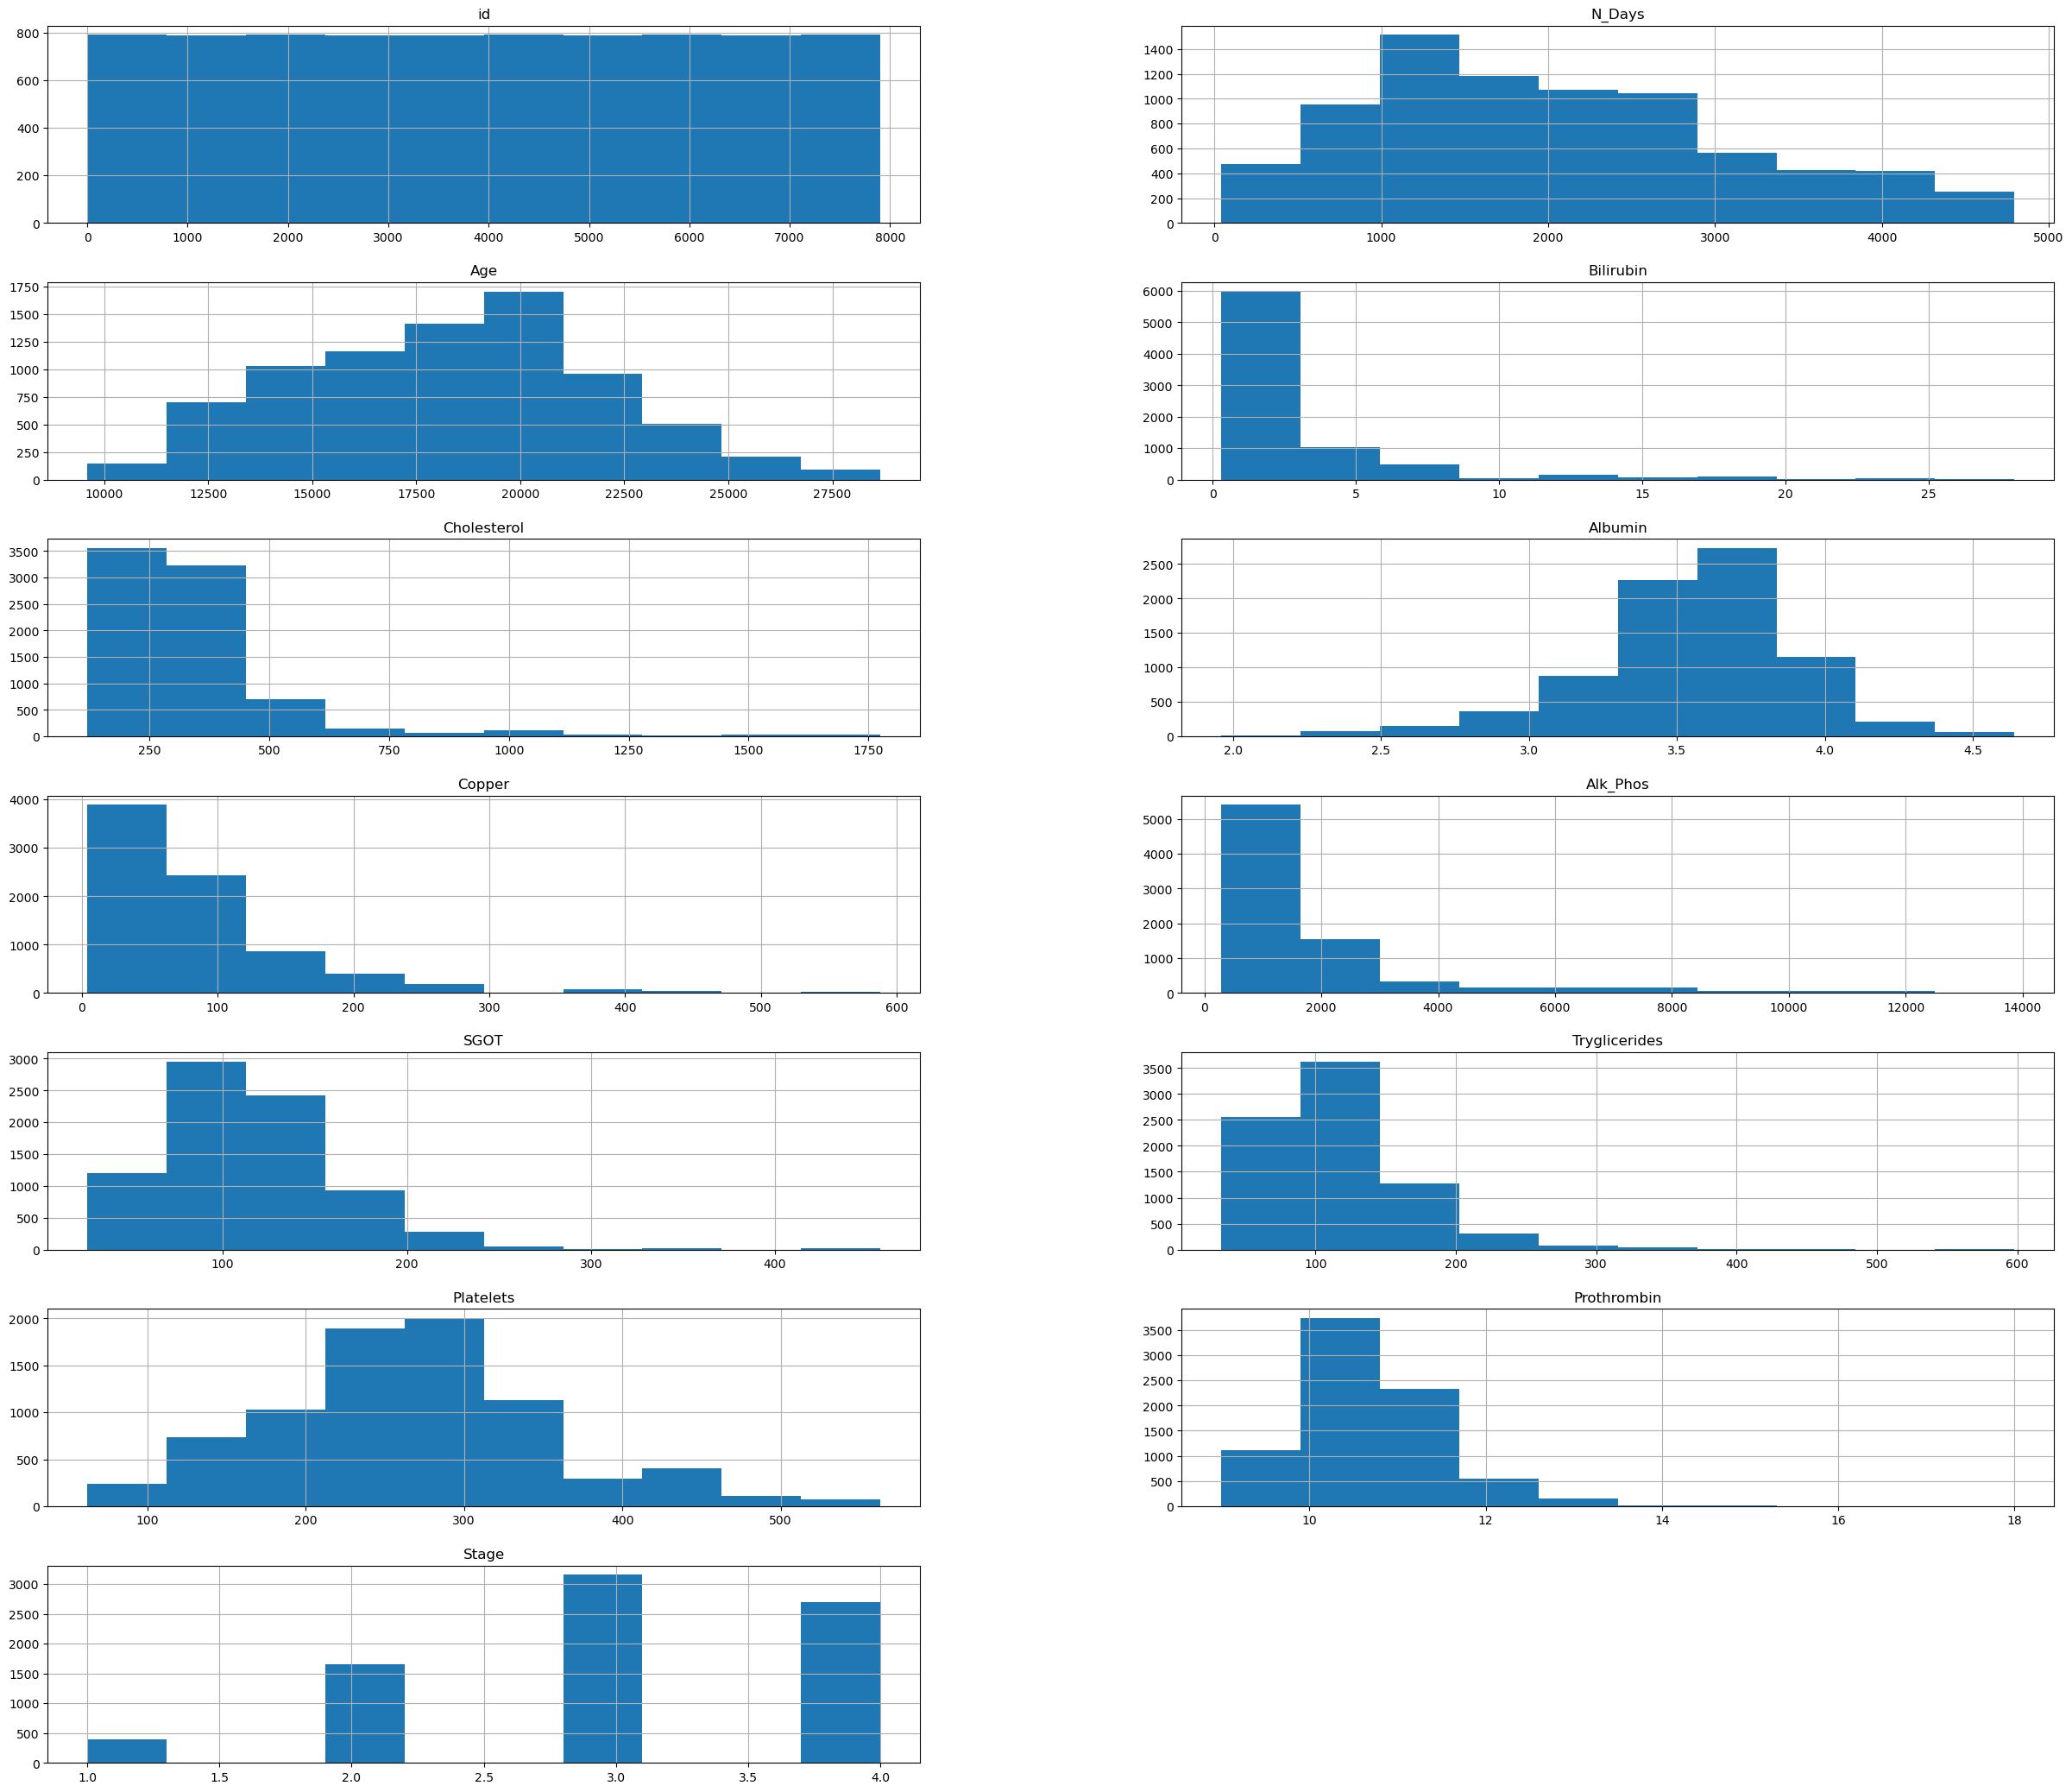

In [58]:
# Hist plots for data
train.hist(layout=(8,2), figsize=(30,30))

In [59]:
# View correlations of features according to health risk
# sns.pairplot(train, hue= 'Status')

In [60]:
train.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [61]:
# Build final datasets
def colchangetrain(train):
    train['Sex']=train['Sex'].replace(['F', 'M'],[0,1])
    train['Sex']=pd.to_numeric(train['Sex'])

    train['Ascites']=train['Ascites'].replace(['N', 'Y'],[0,1])
    train['Ascites']=pd.to_numeric(train['Ascites'])
    
    train['Hepatomegaly']=train['Hepatomegaly'].replace(['N', 'Y'],[0,1])
    train['Hepatomegaly']=pd.to_numeric(train['Hepatomegaly'])
    
    train['Spiders']=train['Spiders'].replace(['N', 'Y'],[0,1])
    train['Spiders']=pd.to_numeric(train['Spiders'])

    train['Edema']=train['Edema'].replace(['N', 'S', 'Y'],[0.2,0.4,0.6])
    train['Edema']=pd.to_numeric(train['Edema'])
    
    train['Drug']=train['Drug'].replace(['D-penicillamine', 'Placebo'],[0,1])
    train['Drug']=pd.to_numeric(train['Drug'])

    train['Status']=train['Status'].replace(['C', 'CL', 'D'],[0,1,2])
    train['Status']=pd.to_numeric(train['Status'])
    return(train)

def colchangetest(train):
    train['Sex']=train['Sex'].replace(['F', 'M'],[0,1])
    train['Sex']=pd.to_numeric(train['Sex'])

    train['Ascites']=train['Ascites'].replace(['N', 'Y'],[0,1])
    train['Ascites']=pd.to_numeric(train['Ascites'])
    
    train['Hepatomegaly']=train['Hepatomegaly'].replace(['N', 'Y'],[0,1])
    train['Hepatomegaly']=pd.to_numeric(train['Hepatomegaly'])
    
    train['Spiders']=train['Spiders'].replace(['N', 'Y'],[0,1])
    train['Spiders']=pd.to_numeric(train['Spiders'])

    train['Edema']=train['Edema'].replace(['N', 'S', 'Y'],[0.2,0.4,0.6])
    train['Edema']=pd.to_numeric(train['Edema'])
    
    train['Drug']=train['Drug'].replace(['D-penicillamine', 'Placebo'],[0,1])
    train['Drug']=pd.to_numeric(train['Drug'])

    return(train)

train=colchangetrain(train)
test=colchangetest(test)
train['Status']=pd.Categorical(train['Status'])

In [62]:
#Create Test and train form train dataset
X = train.drop(columns=['Status'])
y = train[['Status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state= 20)


In [63]:
# Establish Neural Network

nn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=19,),
    tf.keras.layers.Dense(units=512, activation="relu"),
    #tf.keras.layers.Dropout(rate= 0.8),
    tf.keras.layers.Dense(units=512, activation="relu"),
    #tf.keras.layers.Dropout(rate= 0.8),
    tf.keras.layers.Dense(units=512, activation="relu"),
    #tf.keras.layers.Dropout(rate= 0.8),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               10240     
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 1)                 513       
                                                                 
Total params: 536065 (2.04 MB)
Trainable params: 536065 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# Compiles model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn.compile(optimizer = optimizer, loss= 'binary_crossentropy', metrics= ['accuracy'])

In [65]:
# Fits model
history = nn.fit(X_train, y_train,  batch_size= 128, epochs = 200, validation_data = (X_test, y_test))


Epoch 1/200
50/50 [==============================] - 1s 12ms/step - loss: 47.0907 - accuracy: 0.2329 - val_loss: -13.8922 - val_accuracy: 0.3523
Epoch 2/200
50/50 [==============================] - 0s 9ms/step - loss: -24.0935 - accuracy: 0.2489 - val_loss: -39.7003 - val_accuracy: 0.3099
Epoch 3/200
50/50 [==============================] - 0s 10ms/step - loss: -50.9252 - accuracy: 0.2483 - val_loss: -81.7830 - val_accuracy: 0.2935
Epoch 4/200
50/50 [==============================] - 0s 10ms/step - loss: -111.0348 - accuracy: 0.2612 - val_loss: -160.7769 - val_accuracy: 0.3030
Epoch 5/200
50/50 [==============================] - 0s 9ms/step - loss: -219.7404 - accuracy: 0.2568 - val_loss: -299.5203 - val_accuracy: 0.3941
Epoch 6/200
50/50 [==============================] - 0s 10ms/step - loss: -475.7703 - accuracy: 0.2604 - val_loss: -717.3174 - val_accuracy: 0.3156
Epoch 7/200
50/50 [==============================] - 0s 10ms/step - loss: -992.1841 - accuracy: 0.2671 - val_loss: -1407.

In [66]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


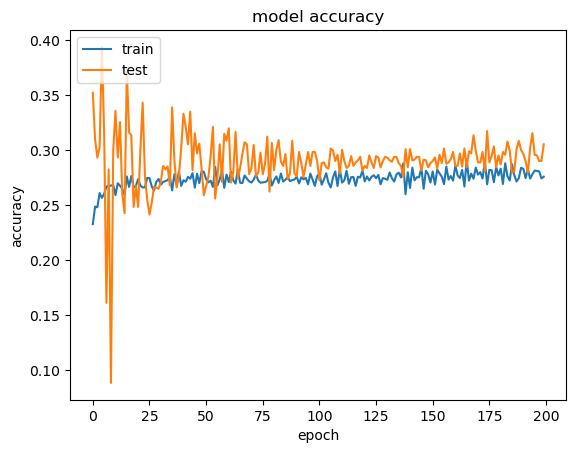

In [67]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

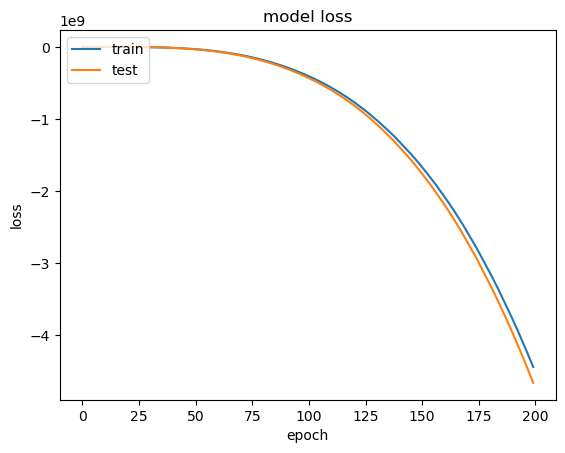

In [68]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

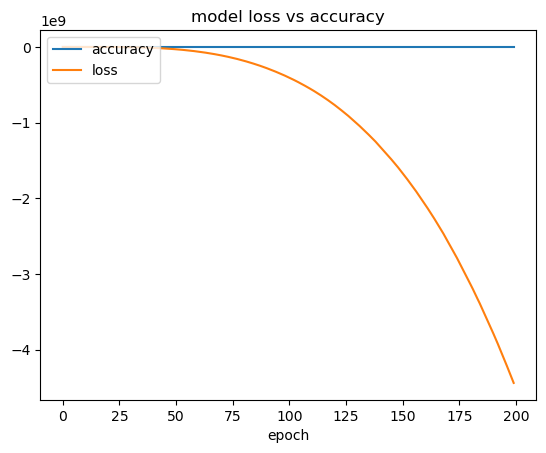

In [69]:
# summarize history for loss vs accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()